In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import pgm


In [2]:
pgmCat = pgm.Pgm("P2", "chat", 320, 240, 255)

In [3]:
pgmCat.read('chat.pgm')

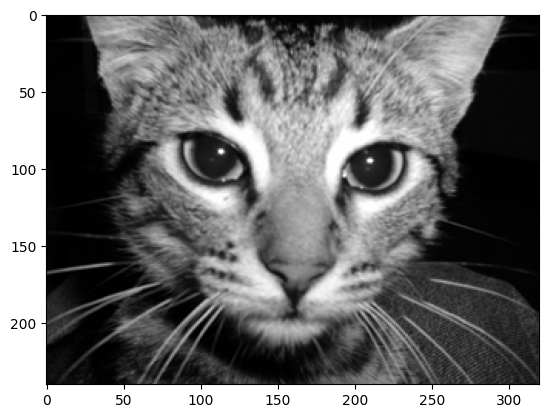

In [4]:
pgmCat.show(pgmCat.mat)

In [5]:
pgmCat.write('chat2.pgm')

In [6]:
print(pgmCat.grayValue())

85.43944010416666


In [7]:
print(pgmCat.stdDeviation())

71.04911303251681


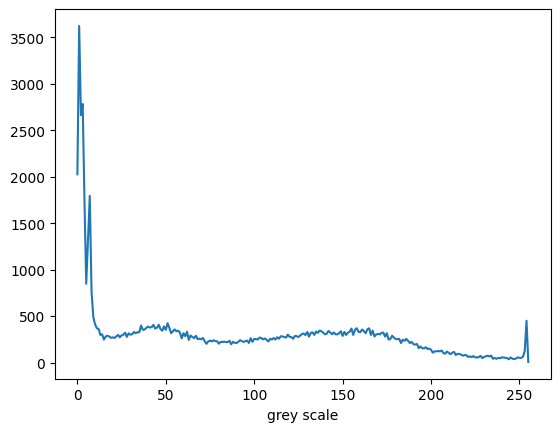

In [8]:
hist = pgmCat.getHist()
def draw_histogram(histogram):
    plt.plot(range(256), histogram)
    plt.xlabel('grey scale')
    plt.show()
    
draw_histogram(hist)

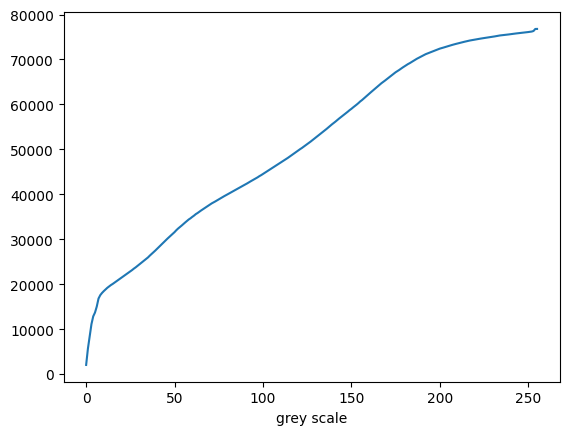

In [9]:
histC = pgmCat.getCumHist(hist)
draw_histogram(histC)
#print(histC)

In [10]:
probCum = pgmCat.getCumProb(hist)
print(probCum)

[0.02638021 0.07355469 0.10822917 0.14446615 0.16705729 0.17809896
 0.19536458 0.21872396 0.2286849  0.2350651  0.24042969 0.24523438
 0.24994792 0.2538151  0.25778646 0.2610026  0.26464844 0.26841146
 0.27207031 0.27553385 0.2790625  0.28251302 0.28617188 0.29005208
 0.29359375 0.29739583 0.30128906 0.30546875 0.30907552 0.31317708
 0.31708333 0.32105469 0.32533854 0.32945313 0.33371094 0.33795573
 0.34315104 0.34773437 0.35236979 0.35723958 0.36227865 0.3671875
 0.37216146 0.37744792 0.38221354 0.38710937 0.39240885 0.39709635
 0.4015625  0.4066276  0.41121094 0.41673177 0.42160156 0.42571615
 0.43010417 0.4347526  0.43914063 0.44360677 0.44778646 0.4511849
 0.45529948 0.4589974  0.46332031 0.4664974  0.47028646 0.47388021
 0.47731771 0.48106771 0.48434896 0.48769531 0.49096354 0.49440104
 0.49739583 0.50002604 0.50298177 0.50606771 0.50902344 0.51214844
 0.51515625 0.51815104 0.52079427 0.5236849  0.52657552 0.52950521
 0.53236979 0.53523438 0.53829427 0.54085938 0.54377604 0.546536

In [11]:
hEq = pgmCat.getEqualizedHist(probCum,hist)
print(hEq)

[   0    0    0    0    0    0 2026    0    0    0    0    0    0    0
    0    0    0    0 3623    0    0    0    0    0    0    0    0 2663
    0    0    0    0    0    0    0    0 2783    0    0    0    0    0
 1735    0    0  848    0    0    0 1326    0    0    0    0    0 1794
    0    0  765  490    0  412  369  362  297  305  247  280  289  281
  266  271  546  298  272  292  299  321  277  315  300  305  329    0
  316  327  326  399  352  356    0  374  387  377  382    0  406  366
  376    0  407  360  343  389  352    0  424  374  316  337  357  337
    0  343  321  261  316  284  576  291  276  264  288  252  257  251
  494  202  227  464  240  231  433  222  222  445  220  432  224  212
  434  241  231  452  237  211  486  254  253  248  269  264  509  245
  227  256  249  512  273  257  283  281  275  269  301  277  275  542
  284  275  291  307  312  296  330  279  320  324  298    0  334  320
  345  337  323  304  310  341  323  305  324  304  303  316  337  287
    0 

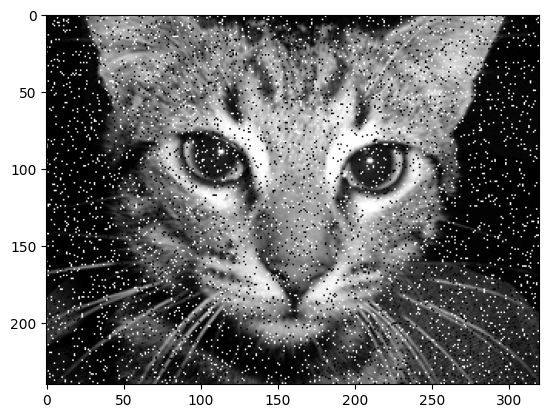

In [12]:
noiseMat = pgmCat.addNoise()
pgmCat.show(noiseMat)

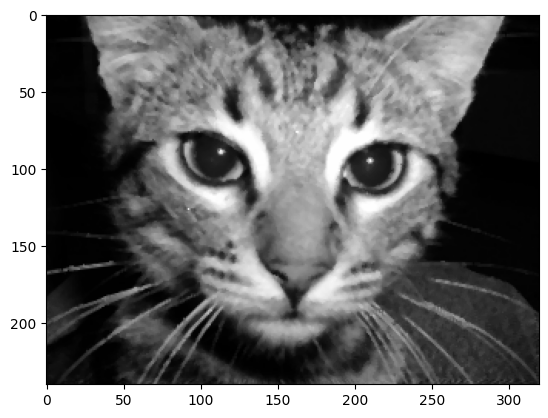

12.486536249766583


In [13]:
medianCat = pgmCat.medianFilter(noiseMat,3)
pgmCat.show(medianCat)
print(pgmCat.getSNR(noiseMat,medianCat))


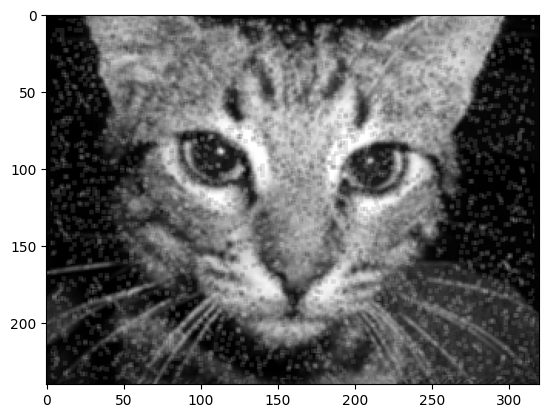

8.826733231957226


In [14]:

noiseMat = pgmCat.addNoise()
averageCat = pgmCat.avgFilter(noiseMat,3)
pgmCat.show(averageCat)
print(pgmCat.getSNR(noiseMat,averageCat))

Pour le bruit défini ci-dessus, le filtre median est plust adapté car il permet d'éléminer le bruit qui est généralement extrême dans l'image (0 ou 255 sera éléminé par le choix de la valeur médianne or il sera comptabilisé dans le filtre moyenneur)

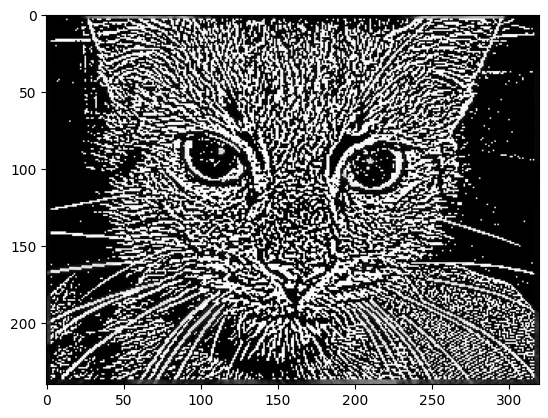

In [15]:
pgmCat.read('chat.pgm')
highPassingCat = pgmCat.highPassingFilter(3)
pgmCat.read('chat.pgm')
pgmCat.show(highPassingCat)